## Analyse des donnée des opérateur

<p style='color:blue; font-style: italic'>Exploring the data with Pandas, Numpy, and Matplotlib</p>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p style='color:blue; font-style: italic'>Reading and Exploring the Comparison-RSRP1 dataset</p>


In [179]:
df=pd.read_csv('Comparison-RSRP1.csv')

In [180]:
df.columns = ['TT', 'OO', 'OR', 'Lon', 'Lat']


In [181]:
df = df.drop(0, axis=0)

<p style='color:blue; font-style: italic'>Columns</p>


In [182]:
df.columns

Index(['TT', 'OO', 'OR', 'Lon', 'Lat'], dtype='object')

<p style='color:blue; font-style: italic'>Previewing the first few rows of the Comparison-RSRP1 dataset</p>


In [183]:
df.head()

,TT,OO,OR,Lon,Lat
1,-80.69999695,-80.69999695,-80.69999695,0,0
2,-80,-91.5,-91.5,0,0
3,-76.5,-80,-77.69999695,10.85557842,33.8850708
4,-76.5,-76.5,-77.69999695,10.85557842,33.8850708
5,-76.5,-89.80000305,-80,0,0


<p style='color:blue; font-style: italic'>Overview of the Comparison-RSRP1 dataset with df.info()</p>


In [184]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86997 entries, 1 to 86997
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TT      86997 non-null  object
 1   OO      86997 non-null  object
 2   OR      86997 non-null  object
 3   Lon     86997 non-null  object
 4   Lat     86997 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


<p style='color:blue; font-style: italic'>Dimensions of the Comparison-RSRP1 dataset</p>


In [185]:
df.shape

(86997, 5)

<p style='color:blue; font-style: italic'>Creating a new column for Unknown Locations in the Comparison-RSRP1 dataset</p>


In [186]:

df['unknown_location'] = np.where((df.Lon == '0') & (df.Lat == '0'), True, False)


<p style='color:blue; font-style: italic'>Previewing the first and last few rows of the Comparison-RSRP1 dataset</p>


In [187]:
df.head()

,TT,OO,OR,Lon,Lat,unknown_location
1,-80.69999695,-80.69999695,-80.69999695,0,0,True
2,-80,-91.5,-91.5,0,0,True
3,-76.5,-80,-77.69999695,10.85557842,33.8850708,False
4,-76.5,-76.5,-77.69999695,10.85557842,33.8850708,False
5,-76.5,-89.80000305,-80,0,0,True


In [188]:
df.tail()

,TT,OO,OR,Lon,Lat,unknown_location
86993,-81.40000153,-99.30000305,-88.09999847,10.86433887,33.86333466,False
86994,-76.19999695,-71.90000153,-83.19999695,10.86440086,33.86333466,False
86995,-80.09999847,-102.4000015,-91.40000153,10.86440086,33.86333466,False
86996,-77.80000305,-74.19999695,-87.80000305,10.86446667,33.8633194,False
86997,-81.90000153,-97.80000305,-87.80000305,10.86446667,33.8633194,False


<p style='color:blue; font-style: italic'>Converting columns to numeric in the Comparison-RSRP1 dataset</p>


In [189]:
df["TT"] = pd.to_numeric(df["TT"], errors='coerce')
df["OO"] = pd.to_numeric(df["OO"], errors='coerce')
df["OR"] = pd.to_numeric(df["OR"], errors='coerce')


<p style='color:blue; font-style: italic'>Determining the best average RSRP value in the Comparison-RSRP1 dataset</p>


In [190]:
mean_TT = df['TT'].mean()
mean_OO = df['OO'].mean()
mean_OR = df['OR'].mean()
if mean_TT > mean_OO and mean_TT > mean_OR:
    print("The best average is in the TT column with value: ",mean_TT)
elif mean_OO > mean_TT and mean_OO > mean_OR:
    print("The best average is in the OO column with value: ",mean_OO)
else:
    print("The best average is in the OR column with value: ",mean_OR)


The best average is in the TT column with value:  -85.63772351010988


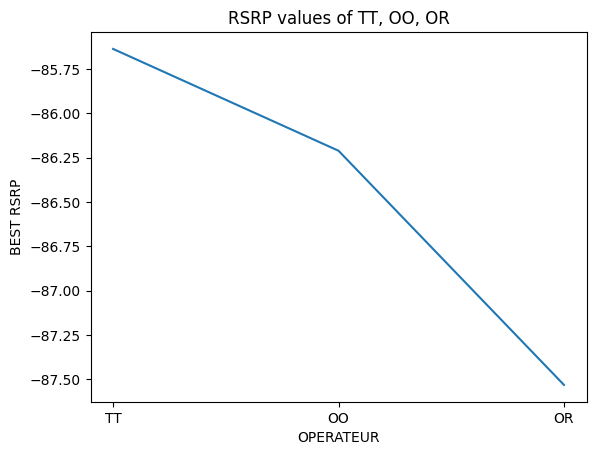

In [192]:
values = [mean_TT, mean_OO, mean_OR]
columns = ['TT', 'OO', 'OR']
plt.plot(columns, values)


plt.xlabel('OPERATEUR')
plt.ylabel('BEST RSRP')
plt.title('RSRP values of TT, OO, OR')

plt.show()




<p style='color:blue; font-style: italic'>Known and Unknown Locations</p>

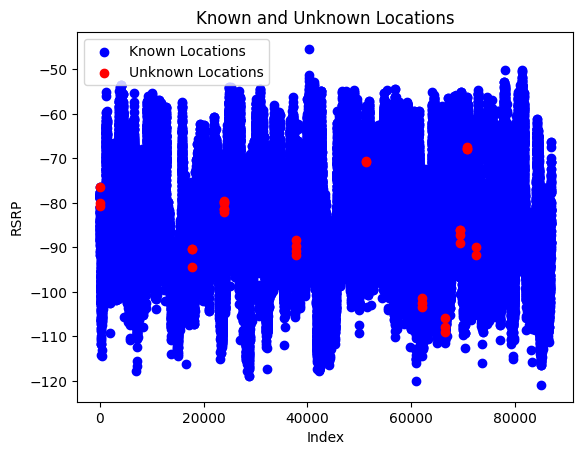

In [257]:

known = df.loc[df['unknown_location'] == False]
unknown = df.loc[df['unknown_location'] == True]
plt.scatter(known.index, known['TT'], c='blue', label='Known Locations')
plt.scatter(unknown.index, unknown['TT'], c='red', label='Unknown Locations')
plt.title('Known and Unknown Locations')
plt.xlabel('Index')
plt.ylabel('RSRP')
plt.legend()
plt.show()

<p style='color:blue; font-style: italic'>Minimum and Maximum RSRP values</p>

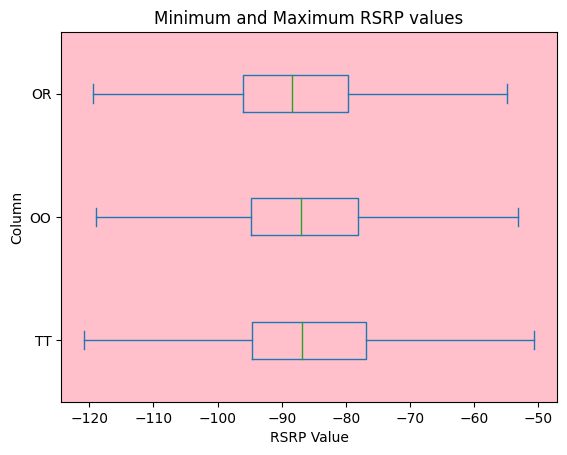

In [231]:
df[['TT', 'OO', 'OR']] = df[['TT', 'OO', 'OR']].apply(pd.to_numeric, errors='coerce')
df[['TT', 'OO', 'OR']].plot.box(vert=False, showfliers=False)
plt.title('Minimum and Maximum RSRP values')
plt.xlabel('RSRP Value')
plt.ylabel('Column')
ax = plt.gca()
ax.set_facecolor('pink')
plt.show()